In [1]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn import metrics
import seaborn as sns
from statistics import mean, stdev
import os
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.stats.stats import kendalltau
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import log_loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D, Conv1DTranspose
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import LSTM, Masking
from tensorflow.keras.layers import MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import activations
from sklearn.utils import resample
sns.set()
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import *
import seaborn as sns
from statistics import mean, stdev
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *

data = np.empty(shape=[0, 222])

all_data = glob.glob('./drive/MyDrive/compsci/all_data.csv')

for j in all_data:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    data = np.append(data, csvrows, axis=0)

print(data.shape)

Loading  ./drive/MyDrive/compsci/all_data.csv
(151452, 222)


In [3]:
os.makedirs('metric_results')

In [4]:
X = data[:,:-2]
y = data[:,-2]

In [5]:
gbc_clf = GradientBoostingClassifier(n_estimators=100,random_state=48)
ada_clf = AdaBoostClassifier(n_estimators=100,random_state=48)
rfc_clf = RandomForestClassifier(max_depth=10, random_state=48,n_estimators=10)
NB_clf = GaussianNB()
NNMLP_clf = MLPClassifier(random_state=48, max_iter=100)
svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

kfold = StratifiedKFold(n_splits = 6,shuffle= True ,random_state =48)

In [6]:
def perform_metrics(clf_name, acc_list,pre_list,rec_list,f1_list, conf_list):
  acc_mean = round(np.mean(acc_list),3)
  acc_std = round(stdev(acc_list),3)
  pre_mean = round(np.mean(pre_list),3)
  pre_std = round(stdev(pre_list),3)
  rec_mean = round(np.mean(rec_list),3)
  rec_std = round(stdev(rec_list),3)
  f1_mean = round(np.mean(f1_list),3)
  f1_std = round(stdev(f1_list),3)
  print('Classifier Name: ',clf_name)
  print('accuracy mean: ',acc_mean,' std: ',acc_std)
  print('precision: ',pre_mean,' std: ',pre_std)
  print('recall: ',rec_mean,' std: ',rec_std)
  print('f1score: ',f1_mean,' std: ',f1_std)

  conf_list = np.nan_to_num(conf_list)
  conf = np.mean(conf_list,axis=0)
  plt.figure(figsize=(8,6))
  sns.heatmap(conf,annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
  plt.title(clf_name + ' confusion matrix')
  return (clf_name,acc_mean,acc_std,pre_mean,pre_std,rec_mean,rec_std,f1_mean,f1_std)

In [7]:
inputs=X
targets=y

categories = ['N','L','R','V','A','F','f','/']

In [8]:
ada_acc_list = []
ada_pre_list = []
ada_rec_list = []
ada_f1_list = []
ada_conf_list = []

rfc_acc_list = []
rfc_pre_list = []
rfc_rec_list = []
rfc_f1_list = []
rfc_conf_list = []

NB_acc_list = []
NB_pre_list = []
NB_rec_list = []
NB_f1_list = []
NB_conf_list = []

NNMLP_acc_list = []
NNMLP_pre_list = []
NNMLP_rec_list = []
NNMLP_f1_list = []
NNMLP_conf_list = []

svc_acc_list = []
svc_pre_list = []
svc_rec_list = []
svc_f1_list = []
svc_conf_list = []
 
lstm_acc_list = []
lstm_pre_list = []
lstm_rec_list = []
lstm_f1_list = []
lstm_conf_list = []

cnn_acc_list = []
cnn_pre_list = []
cnn_rec_list = []
cnn_f1_list = []
cnn_conf_list = []

from sklearn.utils import resample

fold_no = 1
for train, test in kfold.split(inputs, targets):

  N = train[(targets[train])==1.0]
  L = train[(targets[train])==2.0]
  R = train[(targets[train])==3.0]
  V = train[(targets[train])==4.0]
  A = train[(targets[train])==5.0]
  F = train[(targets[train])==6.0]
  f = train[(targets[train])==7.0]
  I = train[(targets[train])==8.0]

  seed=42
  np.random.seed(seed)
  def downsample(arr, n, seed):
      downsampled = resample(arr,replace=False,n_samples=n, random_state=seed)
      return downsampled

  def upsample(arr, n, seed):
      upsampled = resample(arr,replace=True,n_samples=n,random_state=seed)
      return upsampled

  all_class = [N,L,R,V,A,F,f,I]
  abn_class = [L,R,V,A,F,f,I]

  mean_val = np.mean([len(i) for i in abn_class], dtype= int)
  train_sampled = []

  for i in all_class:
      if i.shape[0]> mean_val:
          i = downsample(i,mean_val,seed)
      elif i.shape[0]< mean_val:
          i = upsample(i, mean_val,seed)
      train_sampled.append(i)
      
  train_sampled = np.concatenate(train_sampled)
  np.random.shuffle(train_sampled)
  train1 = train_sampled

  print('ada, Fold Number: ', fold_no)
  ada_clf.fit(inputs[train1], targets[train1])
  y_pred_ada = ada_clf.predict(inputs[test])
  ada_acc_list.append(accuracy_score(targets[test], y_pred_ada))
  ada_pre_list.append(precision_score(targets[test], y_pred_ada, average='weighted'))
  ada_rec_list.append(recall_score(targets[test], y_pred_ada, average='weighted'))
  ada_f1_list.append(f1_score(targets[test], y_pred_ada, average='weighted'))
  ada_cm = confusion_matrix(targets[test], y_pred_ada)
  ada_cm = ada_cm.astype('float')/ ada_cm.sum(axis=1)[:,np.newaxis]
  ada_conf_list.append(ada_cm)
  
  print('rfc, Fold Number: ', fold_no)
  rfc_clf.fit(inputs[train1], targets[train1])
  y_pred_rfc = rfc_clf.predict(inputs[test])
  rfc_acc_list.append(accuracy_score(targets[test], y_pred_rfc))
  rfc_pre_list.append(precision_score(targets[test], y_pred_rfc, average='weighted'))
  rfc_rec_list.append(recall_score(targets[test], y_pred_rfc, average='weighted'))
  rfc_f1_list.append(f1_score(targets[test], y_pred_rfc, average='weighted'))
  rfc_cm = confusion_matrix(targets[test], y_pred_rfc)
  rfc_cm = rfc_cm.astype('float')/ rfc_cm.sum(axis=1)[:,np.newaxis]
  rfc_conf_list.append(rfc_cm)

  print('NB, Fold Number: ', fold_no)
  NB_clf.fit(inputs[train1], targets[train1])
  y_pred_NB = NB_clf.predict(inputs[test])
  NB_acc_list.append(accuracy_score(targets[test], y_pred_NB))
  NB_pre_list.append(precision_score(targets[test], y_pred_NB, average='weighted'))
  NB_rec_list.append(recall_score(targets[test], y_pred_NB, average='weighted'))
  NB_f1_list.append(f1_score(targets[test], y_pred_NB, average='weighted'))
  NB_cm = confusion_matrix(targets[test], y_pred_NB)
  NB_cm = NB_cm.astype('float')/ NB_cm.sum(axis=1)[:,np.newaxis]
  NB_conf_list.append(NB_cm)

  print('NNMLP, Fold Number: ', fold_no)
  NNMLP_clf.fit(inputs[train1], targets[train1])
  y_pred_NNMLP = NNMLP_clf.predict(inputs[test])
  NNMLP_acc_list.append(accuracy_score(targets[test], y_pred_NNMLP))
  NNMLP_pre_list.append(precision_score(targets[test], y_pred_NNMLP, average='weighted'))
  NNMLP_rec_list.append(recall_score(targets[test], y_pred_NNMLP, average='weighted'))
  NNMLP_f1_list.append(f1_score(targets[test], y_pred_NNMLP, average='weighted'))
  NNMLP_cm = confusion_matrix(targets[test], y_pred_NNMLP)
  NNMLP_cm = NNMLP_cm.astype('float')/ NNMLP_cm.sum(axis=1)[:,np.newaxis]
  NNMLP_conf_list.append(NNMLP_cm)

  print('svc, Fold Number: ', fold_no)
  svc_clf.fit(inputs[train1], targets[train1])
  y_pred_svc = svc_clf.predict(inputs[test])
  svc_acc_list.append(accuracy_score(targets[test], y_pred_svc))
  svc_pre_list.append(precision_score(targets[test], y_pred_svc, average='weighted'))
  svc_rec_list.append(recall_score(targets[test], y_pred_svc, average='weighted'))
  svc_f1_list.append(f1_score(targets[test], y_pred_svc, average='weighted'))
  svc_cm = confusion_matrix(targets[test], y_pred_svc)
  svc_cm = svc_cm.astype('float')/ svc_cm.sum(axis=1)[:,np.newaxis]
  svc_conf_list.append(svc_cm)

  inputs1 = inputs.reshape(inputs.shape + (1,1))
  targets1 = to_categorical(y)
  verbose, epoch, batch_size = 0, 5, 64
  # Define the model architecture
  lstmmodel = Sequential()
  lstmmodel.add(LSTM(128, return_sequences=True, input_shape=(inputs1[train1].shape[1],1)))
  lstmmodel.add(LSTM(9, return_sequences=True))
  lstmmodel.add(MaxPooling1D(pool_size=2))
  lstmmodel.add(Flatten())
  lstmmodel.add(Dense(512, activation=tf.nn.relu))    
  lstmmodel.add(Dense(128, activation=tf.nn.relu))    
  lstmmodel.add(Dense(32, activation=tf.nn.relu))
  lstmmodel.add(Dense(9, activation='softmax'))
  lstmmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

  print('LSTM, Fold number: ', fold_no)

  # Fit data to model
  modelhistory= lstmmodel.fit(inputs1[:,:,:,0][train1], targets1[train1], epochs=epoch, 
                             verbose=0, validation_split=0.2, 
                             batch_size = batch_size)
  
  y_pred_lstm = lstmmodel.predict(inputs1[:,:,:,0][test], verbose=1)
  y_pred_lstm = np.argmax(y_pred_lstm,axis=1)
  lstm_actual = np.argmax(targets1[test],axis=1)

  lstm_acc_list.append(accuracy_score(lstm_actual, y_pred_lstm))
  lstm_pre_list.append(precision_score(lstm_actual, y_pred_lstm, average='weighted'))
  lstm_rec_list.append(recall_score(lstm_actual, y_pred_lstm, average='weighted'))
  lstm_f1_list.append(f1_score(lstm_actual, y_pred_lstm, average='weighted'))
  lstm_cm = confusion_matrix(lstm_actual, y_pred_lstm)
  lstm_cm = lstm_cm.astype('float')/ lstm_cm.sum(axis=1)[:,np.newaxis]
  lstm_conf_list.append(lstm_cm)


  inputs1 = inputs.reshape(inputs.shape + (1,1))
  targets1 = to_categorical(y)
  verbose, epoch, batch_size = 0, 5, 64
  # Define the model architecture
  cnnmodel = Sequential()
  cnnmodel.add(Conv1D(filters=128, kernel_size=16,padding='same', activation='relu',input_shape=(inputs1[train1].shape[1],1)))
  cnnmodel.add(BatchNormalization())
  cnnmodel.add(Conv1D(filters=32, kernel_size=16,padding='same', activation='relu'))
  cnnmodel.add(BatchNormalization())
  cnnmodel.add(Conv1D(filters=9, kernel_size=16,padding='same', activation='relu'))
  cnnmodel.add(MaxPooling1D(pool_size=2,padding='same'))
  cnnmodel.add(Flatten())
  cnnmodel.add(Dense(512, activation='relu'))
  cnnmodel.add(Dense(128, activation='relu'))
  cnnmodel.add(Dense(32, activation='relu'))
  cnnmodel.add(Dense(9, activation='softmax'))
  cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

  print('CNN, Fold number: ', fold_no)

  # Fit data to model
  modelhistory= cnnmodel.fit(inputs1[:,:,:,0][train1], targets1[train1], epochs=epoch, 
                             verbose=verbose, validation_split=0.2, 
                             batch_size = batch_size)
  
  y_pred_cnn = cnnmodel.predict(inputs1[:,:,:,0][test], verbose=1)
  y_pred_cnn = np.argmax(y_pred_cnn,axis=1)
  cnn_actual = np.argmax(targets1[test],axis=1)

  cnn_acc_list.append(accuracy_score(cnn_actual, y_pred_cnn))
  cnn_pre_list.append(precision_score(cnn_actual, y_pred_cnn, average='weighted'))
  cnn_rec_list.append(recall_score(cnn_actual, y_pred_cnn, average='weighted'))
  cnn_f1_list.append(f1_score(cnn_actual, y_pred_cnn, average='weighted'))
  cnn_cm = confusion_matrix(cnn_actual, y_pred_cnn)
  cnn_cm = cnn_cm.astype('float')/ cnn_cm.sum(axis=1)[:,np.newaxis]
  cnn_conf_list.append(cnn_cm)

  fold_no = fold_no + 1

ada, Fold Number:  1
rfc, Fold Number:  1
NB, Fold Number:  1
NNMLP, Fold Number:  1
svc, Fold Number:  1
LSTM, Fold number:  1
789/789 [==============================] - 24s 29ms/step
CNN, Fold number:  1
789/789 [==============================] - 3s 3ms/step
ada, Fold Number:  2
rfc, Fold Number:  2
NB, Fold Number:  2
NNMLP, Fold Number:  2
svc, Fold Number:  2
LSTM, Fold number:  2
789/789 [==============================] - 24s 29ms/step
CNN, Fold number:  2
789/789 [==============================] - 3s 3ms/step
ada, Fold Number:  3
rfc, Fold Number:  3
NB, Fold Number:  3
NNMLP, Fold Number:  3
svc, Fold Number:  3
LSTM, Fold number:  3
789/789 [==============================] - 24s 30ms/step
CNN, Fold number:  3
789/789 [==============================] - 2s 3ms/step
ada, Fold Number:  4
rfc, Fold Number:  4
NB, Fold Number:  4
NNMLP, Fold Number:  4
svc, Fold Number:  4
LSTM, Fold number:  4
789/789 [==============================] - 24s 29ms/step
CNN, Fold number:  4
789/789 [==

Classifier Name:  ADA
accuracy mean:  0.498  std:  0.231
precision:  0.781  std:  0.027
recall:  0.498  std:  0.231
f1score:  0.533  std:  0.246
Classifier Name:  RFC
accuracy mean:  0.911  std:  0.005
precision:  0.951  std:  0.001
recall:  0.911  std:  0.005
f1score:  0.925  std:  0.003
Classifier Name:  NB
accuracy mean:  0.397  std:  0.005
precision:  0.839  std:  0.004
recall:  0.397  std:  0.005
f1score:  0.473  std:  0.005
Classifier Name:  NNMLP
accuracy mean:  0.944  std:  0.007
precision:  0.967  std:  0.002
recall:  0.944  std:  0.007
f1score:  0.952  std:  0.005
Classifier Name:  SVC
accuracy mean:  0.947  std:  0.004
precision:  0.971  std:  0.002
recall:  0.947  std:  0.004
f1score:  0.956  std:  0.003
Classifier Name:  LSTM
accuracy mean:  0.941  std:  0.011
precision:  0.969  std:  0.004
recall:  0.941  std:  0.011
f1score:  0.951  std:  0.009
Classifier Name:  CNN
accuracy mean:  0.949  std:  0.011
precision:  0.972  std:  0.004
recall:  0.949  std:  0.011
f1score:  0.

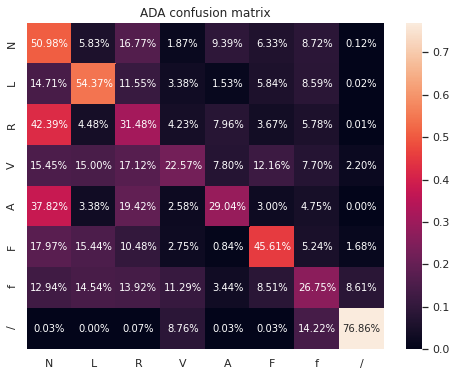

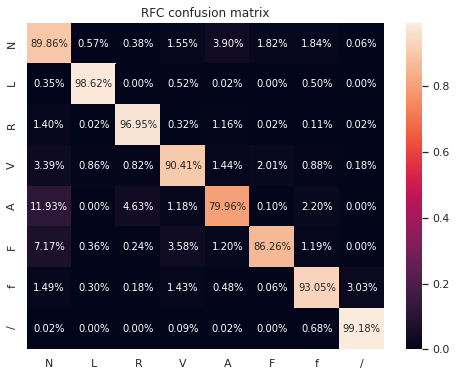

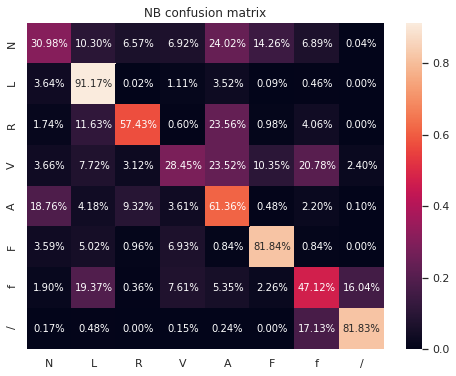

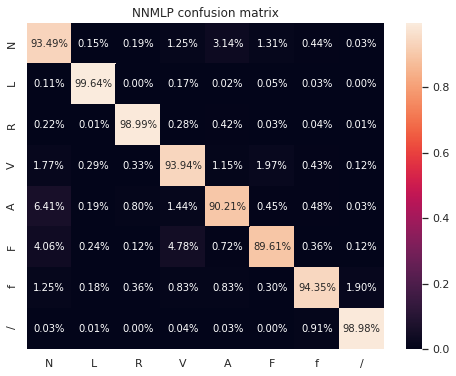

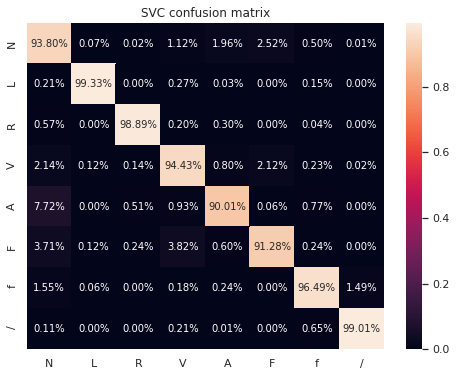

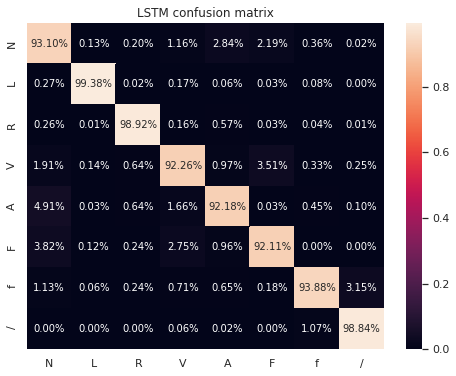

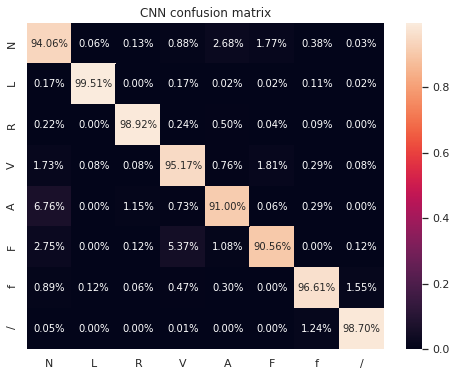

In [9]:
ADA_results = perform_metrics('ADA', ada_acc_list, ada_pre_list, ada_rec_list, ada_f1_list, ada_conf_list)
RFC_results = perform_metrics('RFC', rfc_acc_list, rfc_pre_list, rfc_rec_list, rfc_f1_list, rfc_conf_list)
NB_results =  perform_metrics('NB', NB_acc_list, NB_pre_list, NB_rec_list, NB_f1_list, NB_conf_list)
NNMLP_results = perform_metrics('NNMLP', NNMLP_acc_list, NNMLP_pre_list, NNMLP_rec_list, NNMLP_f1_list, NNMLP_conf_list)
SVC_results = perform_metrics('SVC', svc_acc_list, svc_pre_list, svc_rec_list, svc_f1_list, svc_conf_list)
LSTM_results = perform_metrics('LSTM', lstm_acc_list, lstm_pre_list, lstm_rec_list, lstm_f1_list, lstm_conf_list)
CNN_results = perform_metrics('CNN', cnn_acc_list, cnn_pre_list, cnn_rec_list, cnn_f1_list, cnn_conf_list) 

In [10]:
crossval_results = pd.DataFrame(data = (ADA_results,RFC_results,NB_results,NNMLP_results,SVC_results, LSTM_results, CNN_results))

In [11]:
print(crossval_results)
crossval_results.to_csv('metric_results/crossval_results.csv', encoding='utf-8', index=False)

       0      1      2      3      4      5      6      7      8
0    ADA  0.498  0.231  0.781  0.027  0.498  0.231  0.533  0.246
1    RFC  0.911  0.005  0.951  0.001  0.911  0.005  0.925  0.003
2     NB  0.397  0.005  0.839  0.004  0.397  0.005  0.473  0.005
3  NNMLP  0.944  0.007  0.967  0.002  0.944  0.007  0.952  0.005
4    SVC  0.947  0.004  0.971  0.002  0.947  0.004  0.956  0.003
5   LSTM  0.941  0.011  0.969  0.004  0.941  0.011  0.951  0.009
6    CNN  0.949  0.011  0.972  0.004  0.949  0.011  0.957  0.008


In [12]:
ada_acc = pd.DataFrame(ada_acc_list)
ada_acc.to_csv('metric_results/ADA_acc.csv', encoding='utf-8', index=False)

ada_pre = pd.DataFrame(ada_pre_list)
ada_pre.to_csv('metric_results/ADA_pre.csv', encoding='utf-8', index=False)

ada_rec = pd.DataFrame(ada_rec_list)
ada_rec.to_csv('metric_results/ADA_rec.csv', encoding='utf-8', index=False)

ada_f1s = pd.DataFrame(ada_f1_list)
ada_f1s.to_csv('metric_results/ADA_f1s.csv', encoding='utf-8', index=False)

In [13]:
RFC_acc = pd.DataFrame(rfc_acc_list)
RFC_acc.to_csv('metric_results/RFC_acc.csv', encoding='utf-8', index=False)

RFC_pre = pd.DataFrame(rfc_pre_list)
RFC_pre.to_csv('metric_results/RFC_pre.csv', encoding='utf-8', index=False)

RFC_rec = pd.DataFrame(rfc_rec_list)
RFC_rec.to_csv('metric_results/RFC_rec.csv', encoding='utf-8', index=False)

RFC_f1s = pd.DataFrame(rfc_f1_list)
RFC_f1s.to_csv('metric_results/RFC_f1s.csv', encoding='utf-8', index=False)

In [14]:
NB_acc = pd.DataFrame(NB_acc_list)
NB_acc.to_csv('metric_results/NB_acc.csv', encoding='utf-8', index=False)

NB_pre = pd.DataFrame(NB_pre_list)
NB_pre.to_csv('metric_results/NB_pre.csv', encoding='utf-8', index=False)

NB_rec = pd.DataFrame(NB_rec_list)
NB_rec.to_csv('metric_results/NB_rec.csv', encoding='utf-8', index=False)

NB_f1s = pd.DataFrame(NB_f1_list)
NB_f1s.to_csv('metric_results/NB_f1s.csv', encoding='utf-8', index=False)

In [15]:
NNMLP_acc = pd.DataFrame(NNMLP_acc_list)
NNMLP_acc.to_csv('metric_results/NNMLP_acc.csv', encoding='utf-8', index=False)

NNMLP_pre = pd.DataFrame(NNMLP_pre_list)
NNMLP_pre.to_csv('metric_results/NNMLP_pre.csv', encoding='utf-8', index=False)

NNMLP_rec = pd.DataFrame(NNMLP_rec_list)
NNMLP_rec.to_csv('metric_results/NNMLP_rec.csv', encoding='utf-8', index=False)

NNMLP_f1s = pd.DataFrame(NNMLP_f1_list)
NNMLP_f1s.to_csv('metric_results/NNMLP_f1s.csv', encoding='utf-8', index=False)

In [16]:
SVC_acc = pd.DataFrame(svc_acc_list)
SVC_acc.to_csv('metric_results/SVC_acc.csv', encoding='utf-8', index=False)

SVC_pre = pd.DataFrame(svc_pre_list)
SVC_pre.to_csv('metric_results/SVC_pre.csv', encoding='utf-8', index=False)

SVC_rec = pd.DataFrame(svc_rec_list)
SVC_rec.to_csv('metric_results/SVC_rec.csv', encoding='utf-8', index=False)

SVC_f1s = pd.DataFrame(svc_f1_list)
SVC_f1s.to_csv('metric_results/SVC_f1s.csv', encoding='utf-8', index=False)

In [17]:
LSTM_acc = pd.DataFrame(lstm_acc_list)
LSTM_acc.to_csv('metric_results/LSTM_acc.csv', encoding='utf-8', index=False)

LSTM_pre = pd.DataFrame(lstm_pre_list)
LSTM_pre.to_csv('metric_results/LSTM_pre.csv', encoding='utf-8', index=False)

LSTM_rec = pd.DataFrame(lstm_rec_list)
LSTM_rec.to_csv('metric_results/LSTM_rec.csv', encoding='utf-8', index=False)

LSTM_f1s = pd.DataFrame(lstm_f1_list)
LSTM_f1s.to_csv('metric_results/LSTM_f1s.csv', encoding='utf-8', index=False)

In [18]:
CNN_acc = pd.DataFrame(cnn_acc_list)
CNN_acc.to_csv('metric_results/CNN_acc.csv', encoding='utf-8', index=False)

CNN_pre = pd.DataFrame(cnn_pre_list)
CNN_pre.to_csv('metric_results/CNN_pre.csv', encoding='utf-8', index=False)

CNN_rec = pd.DataFrame(cnn_rec_list)
CNN_rec.to_csv('metric_results/CNN_rec.csv', encoding='utf-8', index=False)

CNN_f1s = pd.DataFrame(cnn_f1_list)
CNN_f1s.to_csv('metric_results/CNN_f1s.csv', encoding='utf-8', index=False)